<a href="https://colab.research.google.com/github/dxniiiv/Progra-III-2024/blob/Bloque3/IA_de_numeros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importar las librerias necesarias
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import tensorflow_datasets as tfds

In [10]:
#cargamos el dataset
dataset, metadata = tfds.load('mnist', as_supervised=True, with_info=True)
datos_entrenamiento, datos_prueba = dataset['train'], dataset['test']
#print(datos_entrenamiento)

<_PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


In [3]:
#asignacion de etiquetas
numero_letras = ["Cero", "Uno", "Dos" , "Tres", "Cuatro", "Cinco", "Seis", "Siete", "Ocho", "Nueve"]

In [9]:
#pasar los datos del dataset a variables
numeros_ejemplo_entrenamiento = metadata.splits['train'].num_examples
#print(numeros_ejemplo_entrenamiento)

numeros_ejemplo_prueba = metadata.splits['test'].num_examples
#print(numeros_ejemplo_prueba)

60000
10000


In [12]:
img = datos_prueba.take(1)
print(img)

<_TakeDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


In [14]:
#funcion normalizadora de los pixeles de 0 a 255 para que vaya de 0 a 1
def normalizacion(imagenes, etiquetas):
    imagenes = tf.cast(imagenes, tf.float32)
    imagenes /= 255
    return imagenes, etiquetas

In [15]:
#normalizamos los datps de entrenamiento y prueba
datos_entrenamiento = datos_entrenamiento.map(normalizacion)
datos_prueba = datos_prueba.map(normalizacion)

In [16]:
#creamos el modelo de nuestra red neuronal
modelo = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
#compilamos el modelo de la red neuronal
modelo.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [18]:
#entrenamos la red neuronal por lotes.
tamaño_lote = 32
datos_entrenamiento = datos_entrenamiento.repeat().shuffle(numeros_ejemplo_entrenamiento).batch(tamaño_lote)
datos_prueba = datos_prueba.batch(tamaño_lote)

In [19]:
#entrenamos nuestro modelo de datos
modelo.fit(datos_entrenamiento, epochs=5, steps_per_epoch=math.ceil(numeros_ejemplo_entrenamiento/tamaño_lote))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.8585 - loss: 0.4824
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9580 - loss: 0.1416
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9701 - loss: 0.0989
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9770 - loss: 0.0731
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9820 - loss: 0.0594


In [20]:
#evaluamos el modelo
test_loss, test_accuracy = modelo.evaluate(datos_prueba, steps=math.ceil(numeros_ejemplo_prueba/tamaño_lote))
print('Precisión en el conjunto de prueba:', test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9752 - loss: 0.0796
Precisión en el conjunto de prueba: 0.9746000170707703


In [22]:
#convertir en matrices las imagenes usando numpy
for imagenes_prueba, etiquetas_prueba in datos_prueba.take(1):
    imagenes_prueba = imagenes_prueba.numpy()
    etiquetas_prueba = etiquetas_prueba.numpy()
    predicciones = modelo.predict(imagenes_prueba)
    print(predicciones)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
[[1.35205602e-09 5.32650347e-06 9.99991477e-01 1.50634332e-06
  7.27063878e-07 4.20775814e-09 4.23586144e-09 7.06550707e-10
  9.85726160e-07 2.47903671e-08]
 [9.99993622e-01 2.17381647e-12 5.98398830e-10 8.63261112e-12
  3.93074950e-13 2.09201509e-08 6.35516653e-06 1.30299065e-13
  1.28941116e-08 4.85058417e-11]
 [1.08316161e-13 8.39874303e-07 5.87110013e-11 3.17816412e-10
  9.99993861e-01 1.28285291e-14 1.96762538e-16 2.83313307e-06
  1.33297506e-09 2.43669251e-06]
 [3.12275020e-04 1.74563465e-05 6.39599011e-06 4.11462330e-04
  1.09614549e-08 4.30292741e-04 3.20068466e-06 1.52916158e-07
  9.98809993e-01 8.68583811e-06]
 [1.57679366e-07 1.88499300e-07 4.06059735e-06 2.03650998e-05
  1.88054253e-10 8.20910007e-09 4.04556137e-17 9.99653220e-01
  5.61572513e-08 3.21886066e-04]
 [7.35062811e-09 1.63919995e-12 5.59367108e-10 1.06097032e-12
  2.31476307e-07 9.94869788e-06 9.99989808e-01 3.15019865e-16
  2.89568032e-08 1.02579891e-08]
 [9.99999821e-01 4.

In [23]:
def graficar_imagen(i, predicciones_array, etiquetas_reales, imagenes):
    predicciones_array, etiqueta_real, img = predicciones_array[i], etiquetas_reales[i], imagenes[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img[...,0], cmap=plt.cm.binary)

    etiqueta_prediccion = np.argmax(predicciones_array)
    if etiqueta_prediccion == etiqueta_real:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("Prediccion: {}".format(numero_letras[etiqueta_prediccion]), color=color)

In [24]:
#graficamos los valores de las matrices.
def graficar_valores_predicciones(i, predicciones_array, etiquetas_reales):
  predicciones_array, etiqueta_real = predicciones_array[i], etiquetas_reales[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predicciones_array, color="#888888")
  plt.ylim([0, 1])
  etiqueta_prediccion = np.argmax(predicciones_array)

  thisplot[etiqueta_prediccion].set_color('red')
  thisplot[etiqueta_real].set_color('blue')

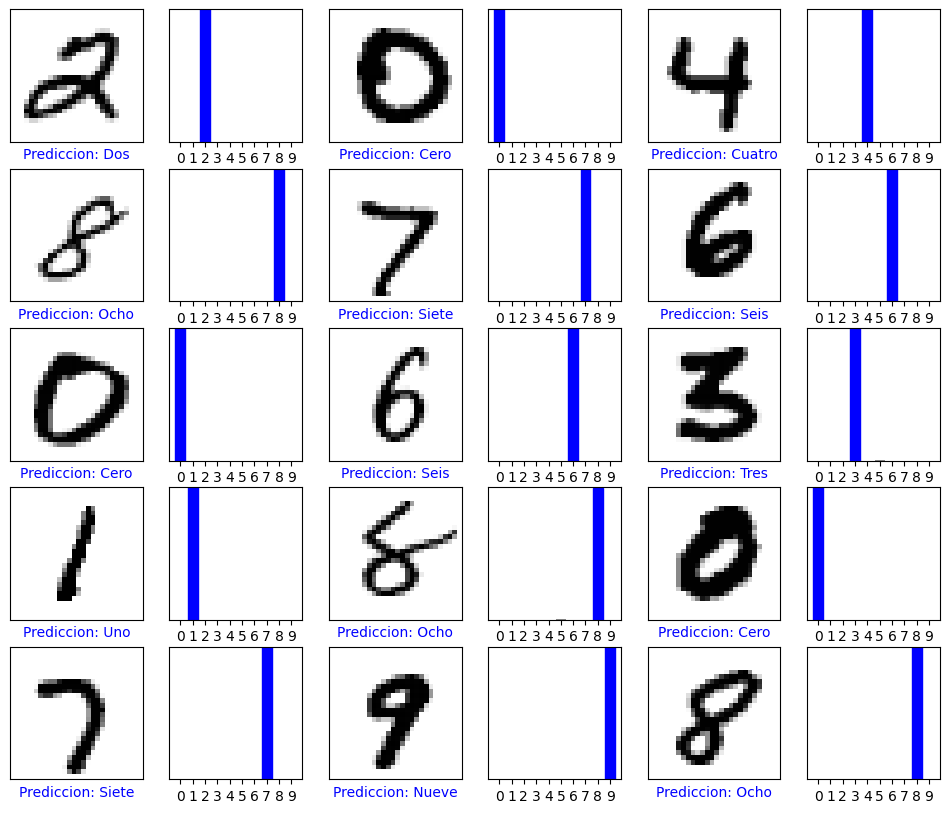

In [25]:
#Realizamos la grafica por cada imagen.
num_filas = 5
num_columnas = 3
num_imagenes = num_filas*num_columnas
plt.figure(figsize=(2*2*num_columnas, 2*num_filas))
for i in range(num_imagenes):
  plt.subplot(num_filas, 2*num_columnas, 2*i+1)
  graficar_imagen(i, predicciones, etiquetas_prueba, imagenes_prueba)
  plt.subplot(num_filas, 2*num_columnas, 2*i+2)
  graficar_valores_predicciones(i, predicciones, etiquetas_prueba)
plt.show()